# Homework 3: Mining Data Streams
Authors: Eva Engel & Tori Leatherman\
28th November 2022

## Task

For this assignment, we chose to analyze the algorithms contained in the paper entitled: "TRIÈST: Counting Local and Global Triangles in Fully-Dynamic Streams with Fixed Memory Size". The algorithms contained in this paper are called TRIÈST algorithms are graph streaming algorithms that utilize standard reservoir sampling. For our analysis, we completed the following steps:
1. We implement the TRIÈST-BASE algorithm which is a graph streaming algorithm using standard reservoir sampling.
2. We implement the TRIÈST-IMPR algorithm, which is a variant of TRIÈST-BASE, which is also a graph stream algorithm with small modifications to lower variance.

We implement and analyze these two aforementioned algorithms using a dataset that contains a social network of facebook users called ego-Facebook, which can be accessed here: https://snap.stanford.edu/data/ego-Facebook.html. We chose this dataset because in order to implement the TRIÈST algorithms, we assume the data is of the form of a fully-dynamic undirected graph.

## Set up

pip install -r /path/to/requirements.txt

### Import

In [7]:
import os

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

from dataset_reader import read_graph
from spectral_clustering import Spectral_clustering



### Data Set - Graph 1

In [4]:
dataset_file_1 = 'example1.dat'
Graph_1 = read_graph(dataset_file_1)


# TODO some EDA
# print(f"Data set contains {number_of_edges} edges.") 

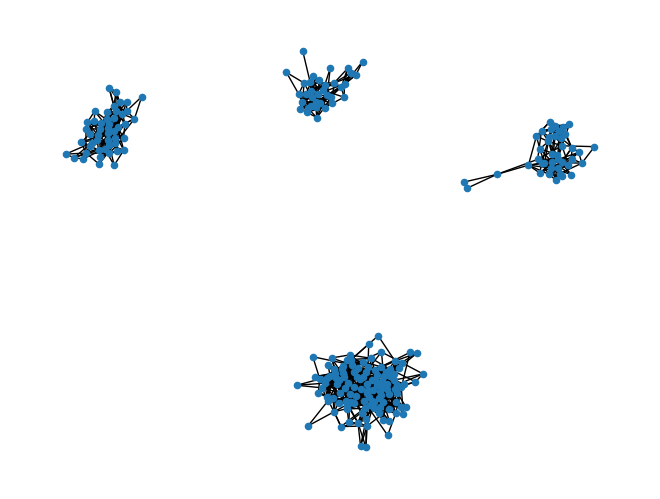

In [5]:
nx.draw(Graph_1, node_size=20)
plt.show()

In [ ]:
# Confirm number of nodes matches metrics on data source
# items = Counter(node for edge in edge_stream
# for node in edge).keys()
# number_of_nodes = len(set(items))

# print(f'Data set contains {number_of_nodes} unique nodes.')

In [ ]:
# # Distribution of edge degree

# full_graph = nx.from_edgelist(edge_stream)

# degrees = []
# for node in full_graph:
#     degrees.append(full_graph.degree[node])

# plt.hist(degrees, bins=20)
# plt.title('Distribution of edge degree')
# plt.xlabel('Degree of node')
# plt.ylabel('Frequency')
# plt.show()

# SPECTRAL CLUSTERING

TODO

In [18]:
clustering = Spectral_clustering(Graph_1)
classes, fiedler, adjacency_matrix = clustering.spectral_clustering(get_optimal_k = True)



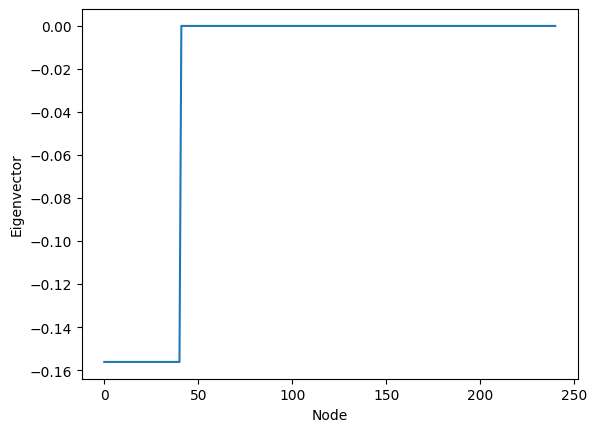

In [16]:
plt.plot(np.sort(fiedler))
plt.xlabel("Node")
plt.ylabel("Eigenvector");

TODO everything else

In [ ]:
M = [750, 1000, 5000, 10000, 20000, 30000]
iterations = 5
all_estimations_improved = []

for m in M:
    estimations = []

    print(f"Finished all {iterations} iterations for M={m}.")
    for i in range(iterations):
        triest = Triest_Improved(M = m, edge_stream = edge_stream)
        estimation_improved = triest.count_triangles()
        estimations.append(estimation_improved)
    all_estimations_improved.append(estimations)

In [ ]:
print([M[0]]*5)
print(all_estimations_improved[0])
for i in range(6):
  plt.scatter([M[i]]*5, all_estimations_improved[i])
plt.axhline(y = exact_number, color = 'black', linestyle = '--')
plt.xlabel('M - size of the reservoir')
plt.ylabel('Estimated number of triangles')
plt.title('TRIEST [Improved]- Analysis of convergence')
plt.show()


for i in range(6):
  plt.scatter([M[i]]*5, all_estimations_improved[i])
plt.axhline(y = exact_number, color = 'black', linestyle = '--')
plt.xlabel('M - size of the reservoir')
plt.ylabel('Estimated number of triangles')
plt.title('TRIEST [Improved]- Analysis of convergence')
plt.ylim(15e5, 175e4)
plt.show()